<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<div class="alert alert-success">
    <b>✅ Комментарий ревьюера V2:</b>

Проект принят! 🎉
    
Успехов в дальнейшем обучении!
</div>
</div>

><h1>Проект "Принятие решений в бизнесе"</h1></div>

Описание проекта
Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

Мое исследование пройдет в 2 этапа.
-  приоретизация сформулированных гипотез, выбор основной гипотезы для отработки и запуска A/B теста.
- обработка полученных в результате проведения А/В теста данных, подсчет и сравнение статистической значимости различия ключевых метрик и принятие решения по результатам А/В теста.

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import scipy.stats as stats

### Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [2]:
# загрузим данные
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option('display.max_colwidth', 0)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

In [3]:
hypothesis['ICE'] = hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
hypothesis[['ICE', 'Hypothesis']].sort_values(by='ICE') 


,ICE,Hypothesis
4,1.000000,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"
3,1.125000,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
5,1.333333,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
1,2.000000,"Запустить собственную службу доставки, что сократит срок доставки заказов"
2,7.000000,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
6,8.000000,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
7,11.200000,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
0,13.333333,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
8,16.200000,"Запустить акцию, дающую скидку на товар в день рождения"


После оценки методом ICE лидирует гипотеза 8 "Запустить акцию, дающую скидку на товар в день рождения".

**Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета**

In [4]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
hypothesis[['RICE', 'Hypothesis']].sort_values(by='RICE') 

,RICE,Hypothesis
4,3.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"
1,4.0,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,4.0,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
3,9.0,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения"
0,40.0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
6,40.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
2,56.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
7,112.0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"


После оценки методом RICE лидирует гипотеза 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

**Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло:**

In [5]:
hypothesis[['RICE', 'ICE']].sort_values(by='RICE', ascending=False)

,RICE,ICE
7,112.0,11.200000
2,56.0,7.000000
0,40.0,13.333333
6,40.0,8.000000
8,16.2,16.200000
3,9.0,1.125000
1,4.0,2.000000
5,4.0,1.333333
4,3.0,1.000000


После оценки методом RICE лидирует гипотеза 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", а гипотеза 8 "Запустить акцию, дающую скидку на товар в день рождения" заняла лишь 5ю строчку.


Оценка методом Rice позволяет понять не только, насколько изменения повлияют на пользователей, какие будут затраты на проверку, но и то, сколько пользователей затронет проверка гипотезы. <br> 
<br>Выбираем гипотезу 7, учитывающую больший охват пользователей.

### Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача
Проанализируйте A/B-тест:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
11.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений:
 1. Остановить тест, зафиксировать победу одной из групп.
 2. Остановить тест, зафиксировать отсутствие различий между группами.
 3. Продолжить тест.

In [6]:
# загрузим данные
orders, visitors = (
    pd.read_csv('/datasets/orders.csv'),
    pd.read_csv('/datasets/visitors.csv')
)

In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.duplicated().sum()

0

In [9]:
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId': 'visitor_id'})

In [10]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
visitors.duplicated().sum()

0

In [13]:
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

- Проведена проверка на наличие дубликатов, пропусков. В данных датасетах они не обнаружены.
- Названия столбцов приведены к нижнему и "змеиному" регистрам.
- Изменен тип данных в колонках с датой и временем на datetime, необходимый для дальнейших расчетов.

In [14]:
#проверяем, есть ли пользователи, попавшие в обе группы
undecided_visitors = orders.groupby('visitor_id').agg({'group':'nunique'})
undecided_visitors = undecided_visitors[undecided_visitors['group']>1]
print(undecided_visitors.count())

group    58
dtype: int64


Было обнаружено 58 пользователей, попавших в обе группы. Посмотрим в процентном соотношении.

In [15]:
#проверим, какой процент пользователей попало в обе группы
print( "Процент пользователей, попавших в обе группы, относительно всех пользователей, сделавших заказы: {:.2%}"
    .format(len(undecided_visitors)/orders['visitor_id'].nunique()) )

Процент пользователей, попавших в обе группы, относительно всех пользователей, сделавших заказы: 5.63%


In [16]:
#оценим, какой процент от выручки совершили эти пользователи
undecided_orders = orders.merge(undecided_visitors, on='visitor_id', how='right')
undecided_orders


,transaction_id,visitor_id,date,revenue,group_x,group_y
0,3679129301,8300375,2019-08-01,10510,B,2
1,4293855558,8300375,2019-08-07,1790,A,2
2,2223239646,199603092,2019-08-15,3488,A,2
3,62794304,199603092,2019-08-22,6976,A,2
4,437656952,199603092,2019-08-02,3488,B,2
...,...,...,...,...,...,...
176,1415970216,4256040402,2019-08-31,5170,A,2
177,453824282,4256040402,2019-08-31,1850,B,2
178,750632879,4256040402,2019-08-12,50,A,2
179,1811671147,4266935830,2019-08-29,78990,A,2


In [17]:
print("Доля покупок пользователей, попавших в обе группы, от общей суммы покупок за время теста: {:.2%}"
    .format(undecided_orders['revenue'].sum()/orders['revenue'].sum()))

Доля покупок пользователей, попавших в обе группы, от общей суммы покупок за время теста: 15.60%


58 пользователей в сумме совершили более 15,5% от общего числа покупок. Пока не будем удалять их из результатов, такое удаление исказит последующие расчеты конверсии. Поэтому данных пользователей оставляем в данных.  
Также стоит посмотреть общее распределение посетителей по группам:

In [18]:
#проверим количество посетителей по группам
print('Количество пользователей в группе А', visitors[visitors['group']=='A']['visitors'].sum())
print('Количество пользователей в группе В', visitors[visitors['group']=='B']['visitors'].sum())

Количество пользователей в группе А 18736
Количество пользователей в группе В 18916


В группе В на 180 посещений больше, чем в группе А. 

**1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.**

In [19]:
#для начала сгруппируем файл с заказами по датам и группам, просуммировав количество пользователей, заказов и выручку
grouped_orders = (
    orders.groupby(['date','group'])
    .agg({'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'})
)
grouped_orders


transaction_id  visitor_id  revenue
date       group                                     
2019-08-01 A      24              20          148579 
           B      21              20          101217 
2019-08-02 A      20              19          93822  
           B      24              23          165531 
2019-08-03 A      24              24          112473 
...               ..              ..             ... 
2019-08-29 B      20              20          231130 
2019-08-30 A      11              10          86460  
           B      24              24          215233 
2019-08-31 A      12              12          61833  
           B      20              20          133129 

[62 rows x 3 columns]

In [20]:
#также сгруппируем файл с посетителями и просуммируем количество по группам и датам
grouped_visitors = (
    visitors.groupby(['date','group'])
    .agg({'visitors':'sum'})
)
grouped_visitors

visitors
date       group          
2019-08-01 A      719     
           B      713     
2019-08-02 A      619     
           B      581     
2019-08-03 A      507     
...               ...     
2019-08-29 B      531     
2019-08-30 A      490     
           B      490     
2019-08-31 A      699     
           B      718     

[62 rows x 1 columns]

In [21]:
#объединим их в одну таблицу, которая будет служить основой для подсчета кумулятивных значений
grouped_data = grouped_orders.merge(grouped_visitors, left_index = True, right_index = True)
grouped_data

transaction_id  visitor_id  revenue  visitors
date       group                                               
2019-08-01 A      24              20          148579   719     
           B      21              20          101217   713     
2019-08-02 A      20              19          93822    619     
           B      24              23          165531   581     
2019-08-03 A      24              24          112473   507     
...               ..              ..             ...   ...     
2019-08-29 B      20              20          231130   531     
2019-08-30 A      11              10          86460    490     
           B      24              24          215233   490     
2019-08-31 A      12              12          61833    699     
           B      20              20          133129   718     

[62 rows x 4 columns]

In [22]:
#теперь сделаем расчет суммы с накоплением в этой же группировке, удалим индексы в виде дат и групп, присвоим новые названия колонок
cumulative_data = (
    grouped_data.groupby(level=-1)[['transaction_id','visitor_id','revenue', 'visitors']]
    .cumsum().reset_index()
)
cumulative_data.columns = ['date','group','transactions','buyers','revenue', 'visitors']
cumulative_data

,date,group,transactions,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,39,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,63,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,584,5559398,17708
58,2019-08-30,A,545,531,4022970,18037
59,2019-08-30,B,620,608,5774631,18198
60,2019-08-31,A,557,543,4084803,18736


In [23]:
#делаем разделение на два фрейма по группам
cumulative_data_A = cumulative_data[cumulative_data['group']=='A'].reset_index()
cumulative_data_B = cumulative_data[cumulative_data['group']=='B'].reset_index()

cumulative_data_B

,index,date,group,transactions,buyers,revenue,visitors
0,1,2019-08-01,B,21,20,101217,713
1,3,2019-08-02,B,45,43,266748,1294
2,5,2019-08-03,B,61,59,380996,1803
3,7,2019-08-04,B,78,75,489567,2573
4,9,2019-08-05,B,101,98,581995,3280
5,11,2019-08-06,B,129,124,824337,3935
6,13,2019-08-07,B,153,148,1049671,4644
7,15,2019-08-08,B,180,175,1270589,5298
8,17,2019-08-09,B,205,199,1431401,5908
9,19,2019-08-10,B,228,222,1539203,6277


In [24]:
cumulative_data_A

,index,date,group,transactions,buyers,revenue,visitors
0,0,2019-08-01,A,24,20,148579,719
1,2,2019-08-02,A,44,39,242401,1338
2,4,2019-08-03,A,68,63,354874,1845
3,6,2019-08-04,A,84,78,425699,2562
4,8,2019-08-05,A,109,103,549917,3318
5,10,2019-08-06,A,127,118,598401,3985
6,12,2019-08-07,A,145,136,740818,4629
7,14,2019-08-08,A,161,152,837097,5239
8,16,2019-08-09,A,177,166,1025603,5856
9,18,2019-08-10,A,193,182,1236098,6262


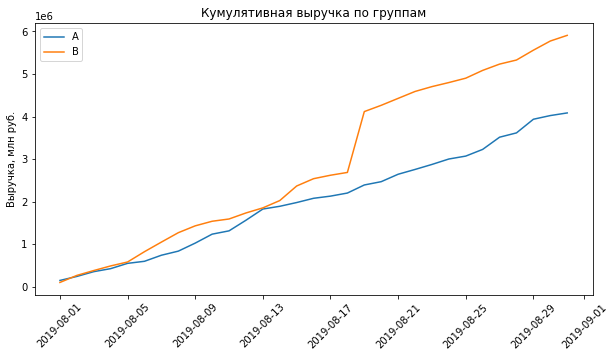

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_data_A['date'], cumulative_data_A['revenue'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['revenue'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивная выручка по группам')
plt.ylabel('Выручка, млн руб.')
plt.legend()
plt.show()

Группа А растет постепенно, в то время как в В есть резкий рост после 17.08

Вероятно, там закрались очень большие покупки. Хорошо, что у нас в группе В больше заказов, при отсеивании аномалий мы только выровняем количество участников теста.

**2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.**


In [26]:
# посчитаем кумулятивный средний чек на одного покупателя
cumulative_data_A['average_check'] = cumulative_data_A['revenue'] / cumulative_data_A['buyers']
cumulative_data_B['average_check'] = cumulative_data_B['revenue'] / cumulative_data_B['buyers']
cumulative_data_A

,index,date,group,transactions,buyers,revenue,visitors,average_check
0,0,2019-08-01,A,24,20,148579,719,7428.950000
1,2,2019-08-02,A,44,39,242401,1338,6215.410256
2,4,2019-08-03,A,68,63,354874,1845,5632.920635
3,6,2019-08-04,A,84,78,425699,2562,5457.679487
4,8,2019-08-05,A,109,103,549917,3318,5339.000000
5,10,2019-08-06,A,127,118,598401,3985,5071.194915
6,12,2019-08-07,A,145,136,740818,4629,5447.191176
7,14,2019-08-08,A,161,152,837097,5239,5507.217105
8,16,2019-08-09,A,177,166,1025603,5856,6178.331325
9,18,2019-08-10,A,193,182,1236098,6262,6791.747253


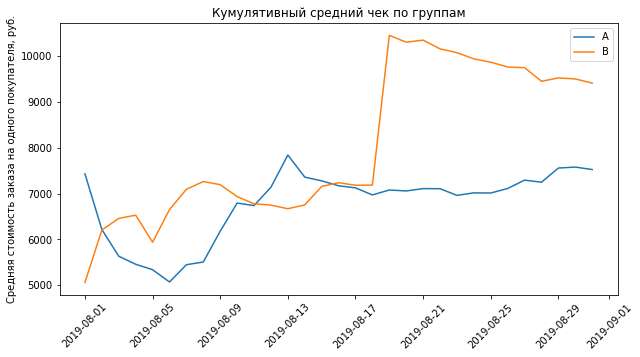

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_data_A['date'], cumulative_data_A['average_check'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['average_check'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивный средний чек по группам')
plt.ylabel('Средняя стоимость заказа на одного покупателя, руб.')
plt.legend()
plt.show()


В очередной раз видим, что по группе В есть крупная покупка после 17.08 и после неё чек этой группы начинает снижаться. В дальнейшем, стоит отсеить аномалии и пересмотреть данные.

У группы А резкий спад по среднему чеку, затем у этой группы начинается резкий рост до середины периода тестирования, после чек почти не увеличивается до конца теста. Почти весь период лидирует группа В.

**3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.**

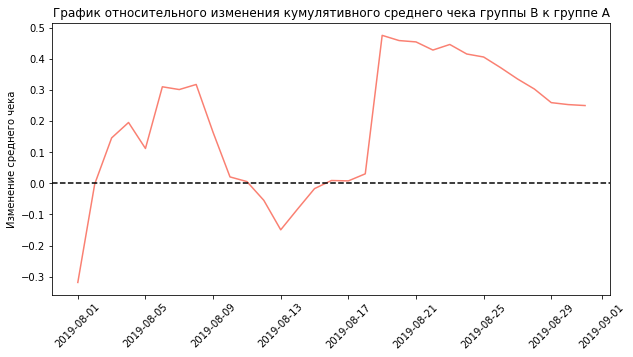

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_data_A['date'], cumulative_data_B['average_check'] / cumulative_data_A['average_check'] -1, color='salmon')
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Изменение среднего чека')
plt.show()

Аналогично с графиками выше на графике отношения кумулятивного среднего чека группы В к А после 17.08 были крупные заказы. В середине теста даже был провал отношения, и контрольная группа показывала худший результат, однако аномальные заказы подняли график, который после всплеска, надо заметить, продолжил снижение. Опять же - далее будет удаление аномально-дорогих заказов, не своейственных выборке, и повторный анализ результатов.

**4. Построить график кумулятивного среднего количества заказов на посетителя по группам**

In [29]:
#добавим колонку с отношением заказов к посетителям (понадобится при построении графиков)
cumulative_data_A['tpv'] = cumulative_data_A['transactions']/cumulative_data_A['visitors']
cumulative_data_B['tpv'] = cumulative_data_B['transactions']/cumulative_data_B['visitors']

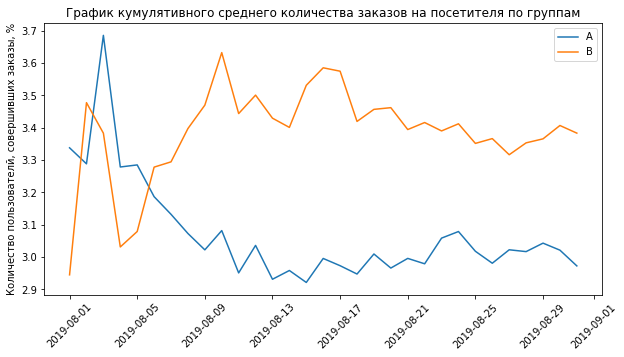

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_data_A['date'], cumulative_data_A['tpv']*100,  label='A')
plt.plot(cumulative_data_A['date'], cumulative_data_B['tpv']*100, label='B')
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Количество пользователй, совершивших заказы, %')
plt.legend()
plt.show()

На первых этапах количество заказов на посетителя в обеих группах "прыгало", но потом выровнялась,  в группе А находится в районе 2,9 до 3,1% в группе В от 3,3  до 3,7%. По графику видно, что группа В лидирует.

**5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**

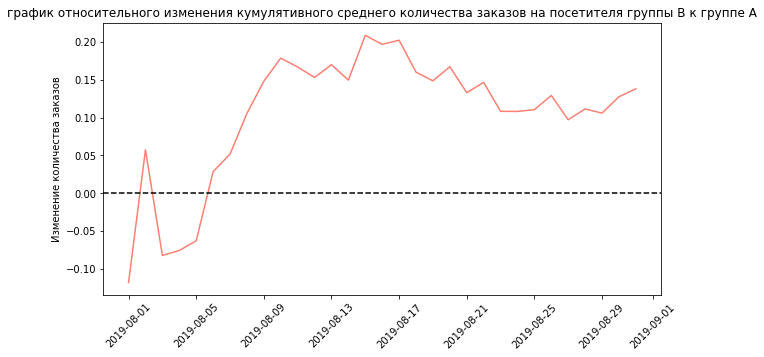

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_data_A['date'], cumulative_data_B['tpv'] / cumulative_data_A['tpv'] -1, color='salmon')
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('Изменение количества заказов')
plt.show()

График показывает лучшую конвертируемость из посетителя в покупателя в контролируемой группе на уровне 12-13%  в конце теста.  Однако есть выбивающиеся всплески.

**6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.**

In [32]:
#сгруппируем заказы по пользователям
orders_per_visitor = (
    orders.groupby('visitor_id')
    .agg({'transaction_id':'nunique'})
    .reset_index()
)
#сгруппируем заказы по пользователям и разделим по группам 
orders_per_visitor_A = (
    orders.query('group == "A"')
    .groupby('visitor_id')
    .agg({'transaction_id':'nunique'})
    .reset_index()
)
#зададим названия колонок
orders_per_visitor_A.columns = ['visitor_id', 'transactions']

orders_per_visitor_B = (
    orders.query('group == "B"')
    .groupby('visitor_id')
    .agg({'transaction_id':'nunique'})
    .reset_index()
)
#зададим названия колонок
orders_per_visitor_B.columns = ['visitor_id', 'transactions']

In [33]:
#зададим названия колонок
orders_per_visitor_A.columns = ['visitor_id', 'transactions']

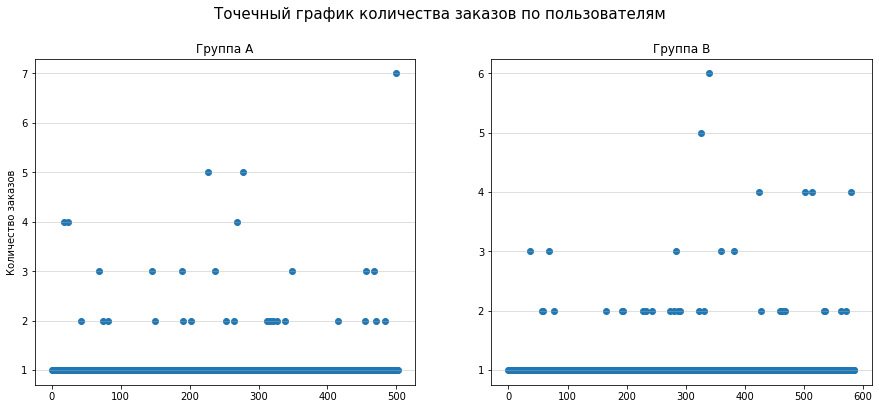

In [34]:
#строим точечные графики количества заказов по пользователям по двум группам
plt.subplots(figsize = (15, 6))
plt.suptitle('Точечный график количества заказов по пользователям', y=1, fontsize=15)

#количество заказов в группе А
plt.subplot(1, 2, 1)
plt.title('Группа А')
plt.scatter(range(0,len(orders_per_visitor_A)), orders_per_visitor_A['transactions'])
plt.ylabel('Количество заказов')
plt.grid(axis='y', alpha=0.5)

#количество заказов в группе В
plt.subplot(1, 2, 2)
plt.title('Группа В')
plt.scatter(range(0,len(orders_per_visitor_B)), orders_per_visitor_B['transactions'])
plt.grid(axis='y', alpha=0.5)
plt.show()

Есть аномальные заказы - больше 4, посчитаем для точности в перцентилях.

**7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей**


In [35]:
print(np.percentile(orders_per_visitor['transaction_id'], [95, 99])) 

[2. 4.]


5% пользователей имеют больше 2 заказов, а у 1% больше 4 заказов. Все, что за 99 перцентилем — аномально. Для дальнейших расчетов будут использоваться данные с покупателями, совершившими 1, 2 или 3 заказа.

**8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.**

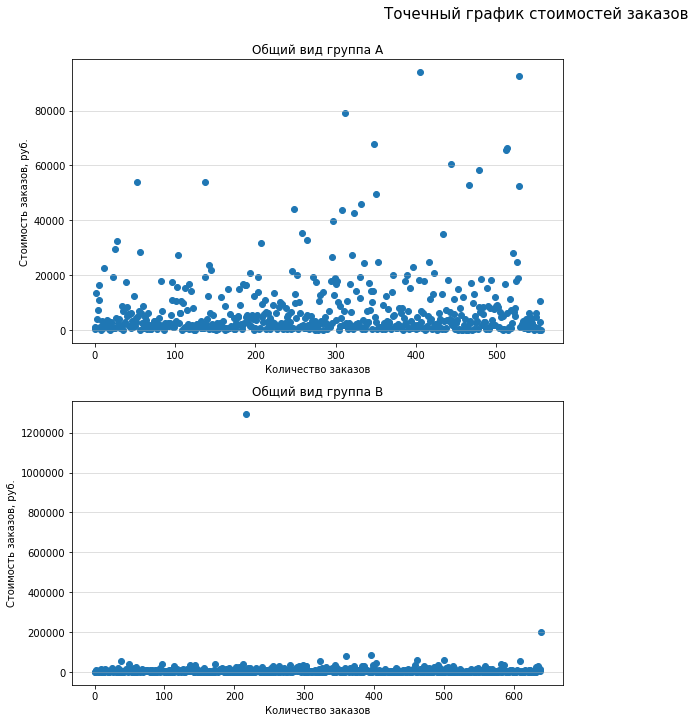

In [36]:
#строим точечные графики стоимостей заказов
plt.subplots(figsize = (15, 10))
plt.suptitle('Точечный график стоимостей заказов', y=1, fontsize=15)

#график стоимостей заказов группы А
plt.subplot(2, 2, 1)
plt.title('Общий вид группа А')
plt.scatter(range(len(orders.query('group == "A"'))), orders.query('group == "A"')['revenue'])
plt.ylabel('Стоимость заказов, руб.')
plt.ticklabel_format(axis='y', style='plain')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Количество заказов')

#график стоимостей заказов группы В
plt.subplot(2, 2, 3)
plt.title('Общий вид группа B')
plt.scatter(range(len(orders.query('group == "B"'))), orders.query('group == "B"')['revenue'])
plt.ylabel('Стоимость заказов, руб.')
plt.ticklabel_format(axis='y', style='plain')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Количество заказов')

plt.tight_layout()
plt.show()

На графике В видны 2 выброса.

**9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.**

In [37]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Только у 5% пользователей заказы больше чем на 28000 р и у 1% более чем на 58233 р. Все, что за 99 перцентилем — явные выбросы. Отбросим их как аномалии.

**10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.**

Для проверки будем использовать непараметрический критерий Манна-Уитни, так как в данных есть выбросы и аномалии.

In [38]:
#создаем выборку со всеми пользователями ("сырую")
order_sample_raw_A = (
    (orders_per_visitor_A['transactions'] +  # сгруппированный список заказов пользователей суммируем с 
    pd.Series(0,range(visitors.query('group=="A"')['visitors'].sum()))) # общим количеством посетителей
    .fillna(0) #после суммирования заменяем на нули образовавшиеся пропуски
)
order_sample_raw_B = (
    (orders_per_visitor_B['transactions'] +
    pd.Series(0,range(visitors.query('group=="B"')['visitors'].sum())))
    .fillna(0)
)

#создаем выборку только с теми пользователями, у кого количсетво заказов меньше 4
order_sample_filtered_A = (
    (orders_per_visitor_A.query('transactions < 4')['transactions'] +
    pd.Series(0,range(visitors.query('group=="A"')['visitors'].sum())))
    .fillna(0)
)

order_sample_filtered_B = (
    (orders_per_visitor_B.query('transactions < 4')['transactions'] +
    pd.Series(0,range(visitors.query('group=="B"')['visitors'].sum())))
    .fillna(0)
)

Проверка статистической значимости различия среднего количества заказов на пользователя по сырым или отфильтрованным данным, предполагает формулировку нулевой и альтернативной гипотез, установку уровня значимости, и проверку результатов работы формулы подсчета с ним.
Сформулируем нулевую гипотезу:

Cреднее количество заказов на пользователя между группами А и В равно.

Сформулируем альтернативную гипотезу:

Cреднее количество заказов на пользователя между группами А и В различно.

Определим уровень значимости в 5%, то есть примем alpha = 0.05. Таким образом, если результат работы функции (минимальный уровень значимости p-value) будет меньше установленного уровня значимости, то нулевая гипотеза отвергается в пользу альтернативной, а если минимальный уровень значимости больше установленного уровня значимости в 5%, то тогда отвергнуть нулевую гипотезу не получится.

Для проверки уровня статистической значимости будем использовать критерий Манна-Уитни.

Первую проверку проведем по сырым данным без устранения аномалий. Вторую проверку - по отфильтрованным.

In [39]:
#задаем уровень статистической значимости
alpha=0.05

In [40]:
#проводим тест и получаем значение минимального уровня значимости
p_value = stats.mannwhitneyu(order_sample_raw_A, order_sample_raw_B)[1]
print('Минимальный уровень значимости при оценке сырых данных:', p_value)


Минимальный уровень значимости при оценке сырых данных: 0.016792355056752608


Так как p_value меньше заданного значения alpha, то мы отвергаем гипотизу о равенстве cреднего количества заказов на пользователя между группами А и В, то есть различие статистически значимо.

In [41]:
print('Относительный прирост среднего количества заказов на пользователя группы B к группе A: {:.2%}'
        .format(order_sample_raw_B.mean() / order_sample_raw_A.mean() - 1) )

Относительный прирост среднего количества заказов на пользователя группы B к группе A: 13.81%


**11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.**

Проверка статистической значимости различия среднего чека по сырым или отфильтрованным данным, точно также предполагает формулировку нулевой и альтернативной гипотез, установку уровня значимости, и проверку результатов работы формулы подсчета с ним.
Сформулируем нулевую гипотезу:

Равенство суммы среднего чека между группами А и В.

Сформулируем альтернативную гипотезу:

Различие суммы среднего чека между группами А и В.

Оставим уровень значимости на уровне 5%. Таким образом, если результат работы функции (минимальный уровень значимости p-value) будет меньше установленного уровня значимости, то нулевая гипотеза отвергается в пользу альтернативной, а если минимальный уровень значимости больше установленного уровня значимости в 5%, то тогда отвергнуть нулевую гипотезу не получится.

Для проверки уровня статистической значимости продолжим использовать критерий Манна-Уитни.

Первую проверку проведем по сырым данным без устранения аномалий. Вторую проверку - по отфильтрованным.

In [42]:
#проводим тест и получаем значение минимального уровня значимости
p_value = stats.mannwhitneyu(orders[orders['group'] =='A']['revenue'], orders[orders['group'] =='B']['revenue'])[1]
print('Минимальный уровень значимости при оценке сырых данных:', p_value)

Минимальный уровень значимости при оценке сырых данных: 0.7292909855432458


Так как p_value получился больше заданного значения alpha, то  мы не можем отвергнуть нулевую гипотизу о равенстве среднего чека. То есть, такое различие не статистически значимо.

In [43]:
print('Относительный прирост среднего чека заказа группы B к группе A: {:.2%}'
        .format(orders[orders['group'] =='B']['revenue'].mean() / orders[orders['group'] =='A']['revenue'].mean() - 1) )


Относительный прирост среднего чека заказа группы B к группе A: 25.87%


Интересно посмотреть на относительный прирост по очищенным данным.

**12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.**

Проверка статистической значимости различия среднего количества заказов на пользователя по сырым или отфильтрованным данным, предполагает формулировку нулевой и альтернативной гипотез, установку уровня значимости, и проверку результатов работы формулы подсчета с ним.
Сформулируем нулевую гипотезу:

Cреднее количество заказов на пользователя между группами А и В равно.

Сформулируем альтернативную гипотезу:

Cреднее количество заказов на пользователя между группами А и В различно.

Определим уровень значимости в 5%, то есть примем alpha = 0.05. Таким образом, если результат работы функции (минимальный уровень значимости p-value) будет меньше установленного уровня значимости, то нулевая гипотеза отвергается в пользу альтернативной, а если минимальный уровень значимости больше установленного уровня значимости в 5%, то тогда отвергнуть нулевую гипотезу не получится.

Для проверки уровня статистической значимости будем использовать критерий Манна-Уитни.

In [44]:
#проводим тест и получаем значение минимального уровня значимости
p_value = stats.mannwhitneyu(order_sample_filtered_A, order_sample_filtered_B)[1]
print('Минимальный уровень значимости при оценке отфильтрованных данных:', p_value)

Минимальный уровень значимости при оценке отфильтрованных данных: 0.016096280306499167


Так как p_value меньше заданного значения alpha, то мы отвергаем нулевую гипотизу о равенстве cреднего чека на пользователя между группами А и В, то есть различие статистически значимо.

In [45]:
print('Относительный прирост среднего количества заказов на пользователя группы B к группе A: {:.2%}'
        .format(order_sample_filtered_B.mean() / order_sample_filtered_A.mean() - 1) )

Относительный прирост среднего количества заказов на пользователя группы B к группе A: 14.99%


**13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.**

Проверка статистической значимости различия среднего количества заказов на пользователя по сырым или отфильтрованным данным, предполагает формулировку нулевой и альтернативной гипотез, установку уровня значимости, и проверку результатов работы формулы подсчета с ним.
Сформулируем нулевую гипотезу:

Cреднее количество заказов на пользователя между группами А и В равно.

Сформулируем альтернативную гипотезу:

Cреднее количество заказов на пользователя между группами А и В различно.

Определим уровень значимости в 5%, то есть примем alpha = 0.05. Таким образом, если результат работы функции (минимальный уровень значимости p-value) будет меньше установленного уровня значимости, то нулевая гипотеза отвергается в пользу альтернативной, а если минимальный уровень значимости больше установленного уровня значимости в 5%, то тогда отвергнуть нулевую гипотезу не получится.

Для проверки уровня статистической значимости будем использовать критерий Манна-Уитни.

In [46]:
p_value = stats.mannwhitneyu(orders.query('group == "A" and revenue < 58000')['revenue'], orders.query('group == "B" and revenue < 58000')['revenue'])[1]
print('Минимальный уровень значимости при оценке отфильтрованных данных:', p_value)

Минимальный уровень значимости при оценке отфильтрованных данных: 0.6148663876601453


Так как p_value получился больше заданного значения alpha, то мы не можем отвергнуть нулевую гипотизу о равенстве среднего чека. То есть, такое различие не статистически значимо.

In [47]:
print ('Относительный прирост среднего чека заказа группы B к группе A: {:.2%}'
        .format(orders.query('group == "B" and revenue < 58000')['revenue'].mean() / orders.query('group == "A" and revenue < 58000')['revenue'].mean() - 1)
    )

Относительный прирост среднего чека заказа группы B к группе A: 2.12%


До и после "очистки данных" гипотеза о равенстве среднего количества заказов на посетителя между группами отвергнута, то есть можно сделать вывод о различии в группах.  Относительный прирост среднего количества заказов на пользователя группы B к группе А составил 14.99%. 

По итогу проведения теста относительное изменение среднего чека составило 2.12%.
Статистически значимые различия в среднем чеке отсуствуют.Таким образом тест показал отсуствие роста среднего чека заказа в контролируемой группе.

**14. Примите решение по результатам теста и объясните его.**

Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Тест проводился с целью проверки гипотезы, для увеличения выручки интернет магазина. По проведенным расчетам уровня статистической значимости, не было обнаружено значимого роста среднего чека, однако обнаружен рост числа заказов в контролируемой группе в 14.7%. 

Тест можно завершать с признанной победой группы В в показателе среднего количества заказов на пользователя и, как следствие, увеличением выручки, принимаем решение остановить тест и зафиксировать победу группы В.